<a href="https://colab.research.google.com/github/ShanmugapriyanManoharan/OpenCV-Deep-Learning/blob/master/Shape_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [0]:
class ShapeDetector:
	def __init__(self):
		pass

	def detect(self, c):
		# Initialize the name of shape and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)

		# If vertices = 3, then triangle
		if len(approx) == 3:
			shape = "triangle"

		# If vertices = 4, then rectangle or square
		elif len(approx) == 4:
			# Compute aspect ratio using bounding box of the contour
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)

			# If aspect ratio near to 1, then shape is square. otherwise rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

		# If vertices =5, then pentagon
		elif len(approx) == 5:
			shape = "pentagon"

    # If vertices =6, then Hexagon
		elif len(approx) == 6:
			shape = "Hexagon"

		# Else, the shape is assumed to be circle
		else:
			shape = "circle"

		# return the name of the shape
		return shape

In [0]:
# load the image and resize using imutils to a smaller factor so that the shapes can be approximated better
image = cv2.imread("shapes.png")
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])

In [0]:
# Grayscale the image and blur the image and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

In [0]:
# find contours in the thresholded image and initialize the shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

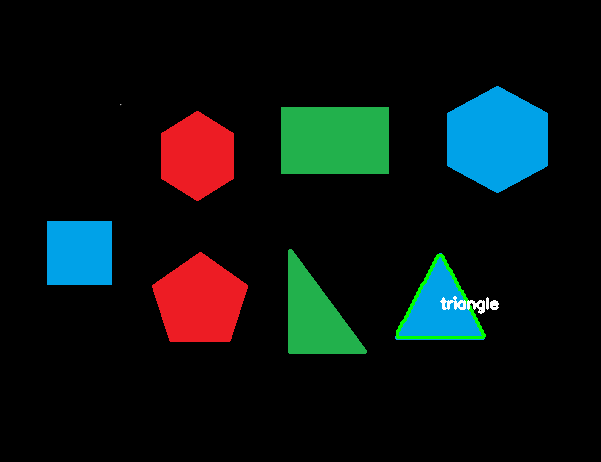

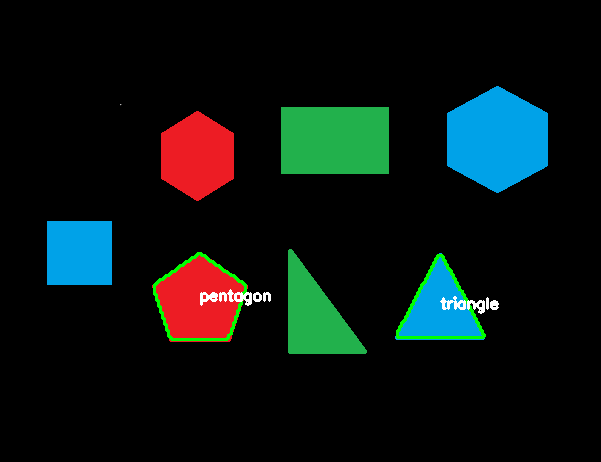

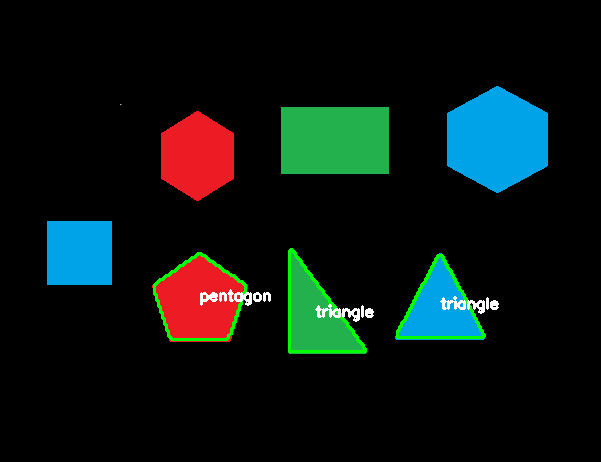

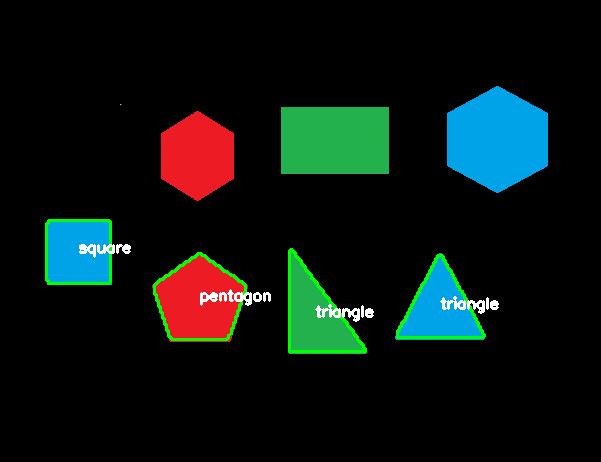

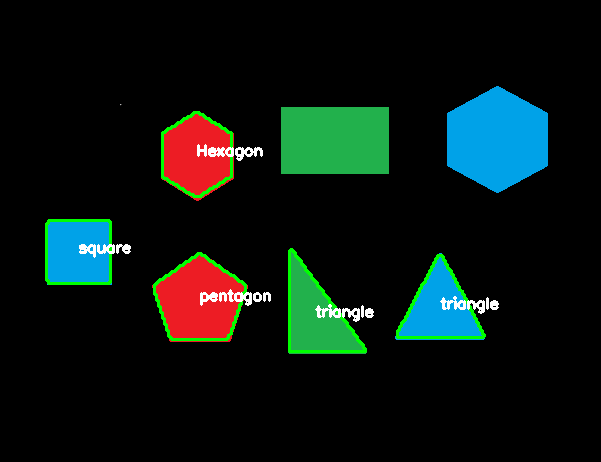

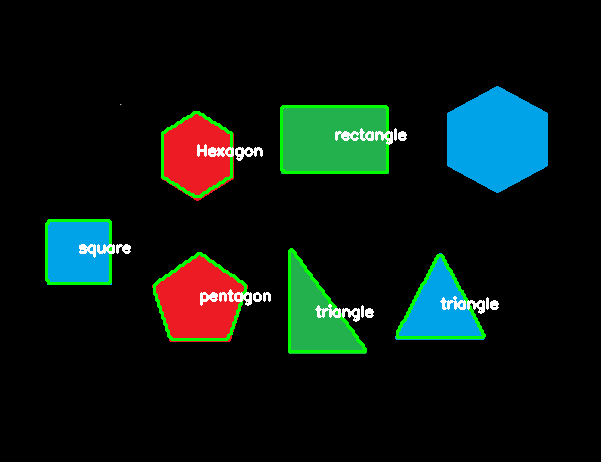

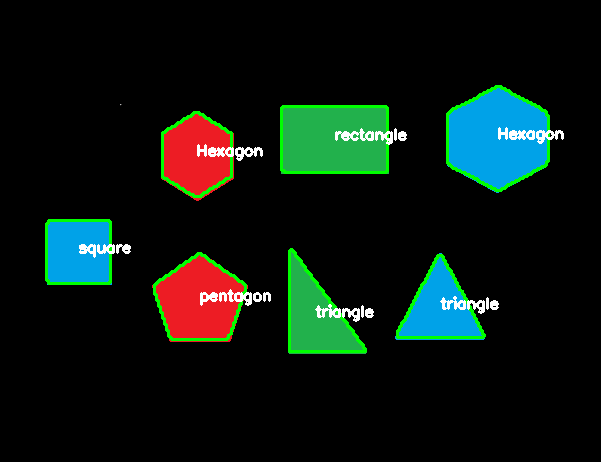

In [40]:
# loop over the contours
for c in cnts:
	# compute the center of the contour, then detect the name of the shape
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)

	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)

	# Display the output image
	cv2_imshow(image)